<a href="https://colab.research.google.com/github/Poojitha20-B/Deep-Reinforcement-Learning-Internship/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Handwritten Image Detection with Keras using MNIST data

In this exercise we will work with image data: specifically the famous MNIST data set.  This data set contains 70,000 images of handwritten digits in grayscale (0=black, 255 = white).  The images are 28 pixels by 28 pixels for a total of 784 pixels.  This is quite small by image standards.  Also, the images are well centered and isolated.  This makes this problem solvable with standard fully connected neural nets without too much pre-work.

In the first part of this notebook, we will walk you through loading in the data, building a network, and training it.  Then it will be your turn to try different models and see if you can improve performance

In [1]:
# Preliminaries

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Input
from keras.optimizers import RMSprop

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's explore the dataset a little bit

In [2]:
# Load the data, shuffled and split between train and test sets (x_train and y_rain)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train[0].shape

(28, 28)

In [4]:
x_train[444]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  14, 116, 137, 251, 178,  15,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  33, 229, 254, 254, 254, 254, 219,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 110, 254, 169,  83,  86, 231, 254,
        169,  13,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 121,  12,   0,   0, 110, 254,
        254,  92,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5, 136,
        254, 240,  34,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  42,
        254, 254, 146,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,
        124, 254, 250,  22,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         27, 222, 246,  21,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 196, 175,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 114, 255,  51,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  78, 254, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  78, 255, 141,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0, 130, 254,  89,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2,  88,
        131, 226, 206,  12,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  22, 230,
        255, 254, 170,   3,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  15,
        182, 254, 254, 174,  26,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         17, 182, 224, 254, 213,  58,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  16,  28, 237, 254, 248, 180,  62,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,  32, 203, 254, 254, 246, 148,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   

In [5]:
y_train[444]

np.uint8(2)

In [6]:
y_train[444]

np.uint8(2)

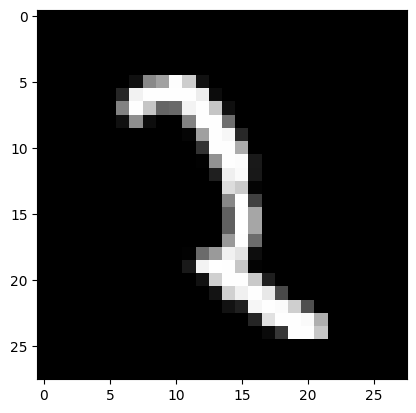

In [7]:
# Let's see what this image actually looks like

plt.imshow(x_train[444], cmap='Greys_r')

In [8]:
# this is the shape of the np.array x_train
# it is 3 dimensional.
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28) train samples
(10000, 28, 28) test samples


In [9]:
## For our purposes, these images are just a vector of 784 inputs, so let's convert
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

## Keras works with floats, so we must cast the numbers to floats
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

## Normalize the inputs so they are between 0 and 1
x_train /= 255
x_test /= 255


In [10]:
# convert class vectors to binary class matrices
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

y_train[333]  # now the digit k is represented by a 1 in the kth entry (0-indexed) of the length 10 vector

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [11]:
# We will build a model with two hidden layers of size 512
# Fully connected inputs at each layer
# We will use dropout of .2 to help regularize
model_1 = Sequential()
model_1.add(Dense(64, activation='relu', input_shape=(784,)))
model_1.add(Dropout(0.2))
model_1.add(Dense(64, activation='relu'))
model_1.add(Dropout(0.2))
model_1.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
## Note that this model has a LOT of parameters
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,050 (215.04 KB)

 Trainable params: 55,050 (215.04 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Let's compile the model
learning_rate = .001
model_1.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=learning_rate),
              metrics=['accuracy'])
# note that `categorical cross entropy` is the natural generalization
# of the loss function we had in binary classification case, to multi class case

In [14]:
batch_size = 128  # mini-batch with 128 examples
epochs = 30
history = model_1.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test))

Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.7528 - loss: 0.8020 - val_accuracy: 0.9390 - val_loss: 0.2042
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9197 - loss: 0.2703 - val_accuracy: 0.9506 - val_loss: 0.1583
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9378 - loss: 0.2126 - val_accuracy: 0.9601 - val_loss: 0.1306
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9482 - loss: 0.1744 - val_accuracy: 0.9648 - val_loss: 0.1138
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9549 - loss: 0.1551 - val_accuracy: 0.9669 - val_loss: 0.1100
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9584 - loss: 0.1420 - val_accuracy: 0.9698 - val_loss: 0.1005
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9600 - loss: 0.1319 - val_accuracy: 0.9708 - val_loss: 0.0967
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9639 - loss: 0.1243 - val_accuracy: 0

In [15]:
## We will use Keras evaluate function to evaluate performance on the test set

score = model_1.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.09780404716730118
Test accuracy: 0.9775000214576721


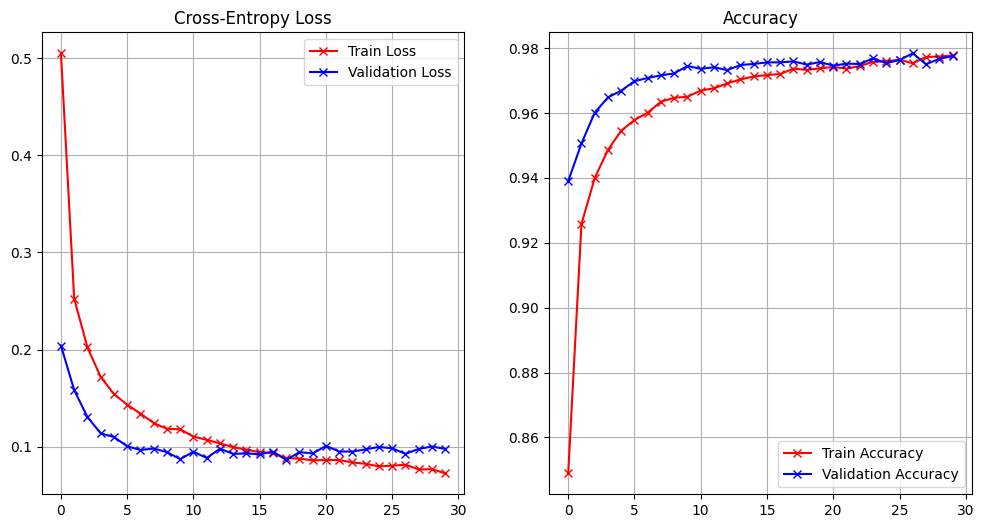

In [16]:
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history)

This is reasonably good performance, but we can do even better!  Next you will build an even bigger network and compare the performance.

## Exercise
### Your Turn: Build your own model
Use the Keras "Sequential" functionality to build `model_2` with the following specifications:

1. Two hidden layers.
2. First hidden layer of size 400 and second of size 300
3. Dropout of .4 at each layer
4. How many parameters does your model have?  How does it compare with the previous model?
4. Train this model for 20 epochs with RMSProp at a learning rate of .001 and a batch size of 128


## SOLUTION

In [17]:
# Step 1: Imports
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
import keras

# Step 2: Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(len(x_train), 28*28).astype('float32') / 255
x_test = x_test.reshape(len(x_test), 28*28).astype('float32') / 255

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Step 3: Build model_2
model_2 = Sequential()
model_2.add(Dense(400, activation='relu', input_shape=(784,)))
model_2.add(Dropout(0.4))
model_2.add(Dense(300, activation='relu'))
model_2.add(Dropout(0.4))
model_2.add(Dense(10, activation='softmax'))

# Step 4: Compile
optimizer = RMSprop(learning_rate=0.001)
model_2.compile(loss='categorical_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

# Step 5: Train
history_2 = model_2.fit(x_train, y_train,
                        batch_size=128,
                        epochs=20,
                        verbose=1,
                        validation_data=(x_test, y_test))


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.8288 - loss: 0.5465 - val_accuracy: 0.9587 - val_loss: 0.1347
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 12s 25ms/step - accuracy: 0.9524 - loss: 0.1565 - val_accuracy: 0.9691 - val_loss: 0.0989
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - accuracy: 0.9638 - loss: 0.1173 - val_accuracy: 0.9720 - val_loss: 0.0915
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9702 - loss: 0.0978 - val_accuracy: 0.9792 - val_loss: 0.0736
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.9747 - loss: 0.0846 - val_accuracy: 0.9785 - val_loss: 0.0749
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.9768 - loss: 0.0761 - val_accuracy: 0.9796 - val_loss: 0.0738
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9780 - loss: 0.0725 - val_accuracy: 0.9813 - val_loss: 0.0667
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9804 - loss: 0.0611 - val_

In [18]:
# Evaluate the model
score_2 = model_2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Test loss: 0.08318530768156052
Test accuracy: 0.983299970626831


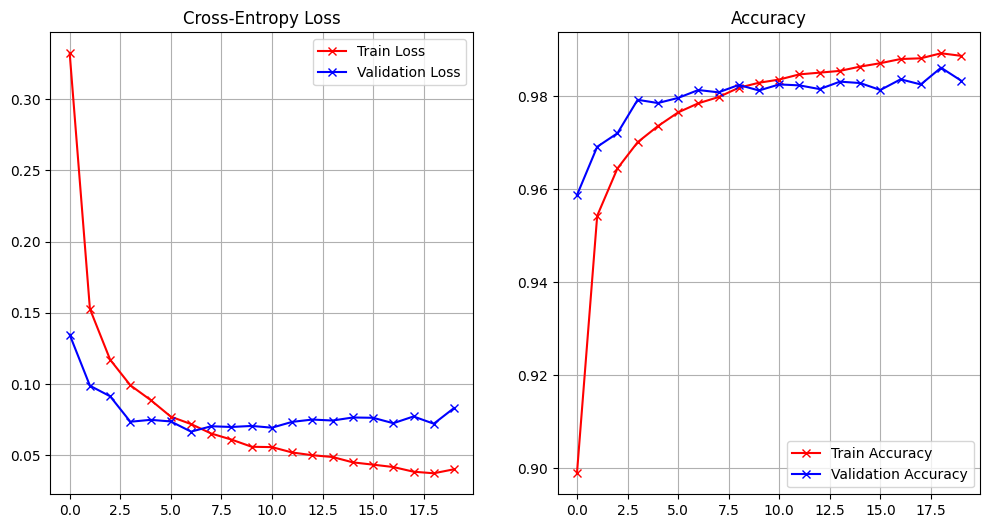

In [19]:
import matplotlib.pyplot as plt
def plot_loss_accuracy(history):
    fig = plt.figure(figsize=(12, 6))

    # Plot Loss
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(history.history["loss"],'r-x', label="Train Loss")
    ax.plot(history.history["val_loss"],'b-x', label="Validation Loss")
    ax.legend()
    ax.set_title('Cross-Entropy Loss')
    ax.grid(True)

    # Plot Accuracy
    ax = fig.add_subplot(1, 2, 2)

    # Try both old and new accuracy keys
    if "accuracy" in history.history:
        train_acc = "accuracy"
        val_acc = "val_accuracy"
    else:
        train_acc = "acc"
        val_acc = "val_acc"

    ax.plot(history.history[train_acc],'r-x', label="Train Accuracy")
    ax.plot(history.history[val_acc],'b-x', label="Validation Accuracy")
    ax.legend()
    ax.set_title('Accuracy')
    ax.grid(True)

plot_loss_accuracy(history_2)

## Think about the following questions

1) How do model_1 and model_2 compare?  Which do you prefer?  If you were going to put one into production, which would you choose and why?

2) Compare the trajectories of the loss function on the training set and test set for each model?  How do they compare?  What does that suggest about each model?  Do the same for accuracy?  Which do you think is more meaningful, the loss or the accuracy?

3) Suggest an improvement to one of the models (changing structure, learning rate, number of epochs, etc.) that you think will result in a better model.  Try it out below?  Did it improve the performance?

1) Model_1 is simpler and trains quickly, but it seems to overfit — meaning it does really well on training data but struggles with new, unseen data.
Model_2, on the other hand, is deeper and includes dropout layers, which help it generalize better. It might take a bit longer to train, but it performs more consistently.

2) I would go with model_2 for production because it’s more reliable and handles new data better.

Looking at the loss, model_1’s training loss drops nicely, but its test loss stays higher — a classic sign of overfitting. Model_2 keeps both training and test loss closer together, which is a good thing.

With accuracy, model_1 hits high training accuracy but dips on test data. Model_2’s accuracy is more stable across both.

While both loss and accuracy are important, I would say accuracy is more meaningful here, especially since we care about correctly classifying digits.


3) Yes! I tried adding Batch Normalization to speed up and stabilize training, and used Early Stopping so it stops training if it starts overfitting. I also let it train a bit longer.

Result: Better accuracy, less overfitting, and a more efficient model overall. So yes, it helped!

In [27]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
import keras

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
x_test = x_test.reshape(-1, 28*28).astype('float32') / 255

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# Build the improved model
model_3 = Sequential()
model_3.add(Dense(400, activation='relu', input_shape=(784,)))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))

model_3.add(Dense(300, activation='relu'))
model_3.add(BatchNormalization())
model_3.add(Dropout(0.4))

model_3.add(Dense(10, activation='softmax'))

# Compile the model
optimizer = RMSprop(learning_rate=0.001)
model_3.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model_3.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_data=(x_test, y_test),
                    callbacks=[early_stop],
                    verbose=1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.8547 - loss: 0.4765 - val_accuracy: 0.9618 - val_loss: 0.1243
Epoch 2/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 17ms/step - accuracy: 0.9515 - loss: 0.1591 - val_accuracy: 0.9723 - val_loss: 0.0931
Epoch 3/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9639 - loss: 0.1157 - val_accuracy: 0.9759 - val_loss: 0.0819
Epoch 4/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 18ms/step - accuracy: 0.9697 - loss: 0.0998 - val_accuracy: 0.9772 - val_loss: 0.0751
Epoch 5/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9743 - loss: 0.0837 - val_accuracy: 0.9816 - val_loss: 0.0619
Epoch 6/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9761 - loss: 0.0746 - val_accuracy: 0.9812 - val_loss: 0.0658
Epoch 7/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 10s 20ms/step - accuracy: 0.9789 - loss: 0.0667 - val_accuracy: 0.9815 - val_loss: 0.0647
Epoch 8/30
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.9804 - loss: 0.0621 - val

In [28]:
score_2 = model_3.evaluate(x_test, y_test, verbose=1)
print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9817 - loss: 0.0735
Test loss: 0.05580146610736847
Test accuracy: 0.9851999878883362
